In [11]:
import pandas as pd
import numpy as np

num_records = 50

order_ids = np.arange(1000, 1000 + num_records)

end_date = pd.to_datetime('today')
start_date = end_date - pd.Timedelta(days=365)
order_dates = pd.to_datetime(start_date + (end_date - start_date) * np.random.rand(num_records))

products_list = ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Webcam', 'Headphones', 'Speaker', 'Printer']

categories_list = ['Electronics', 'Peripherals', 'Audio', 'Office Supplies']

products = np.random.choice(products_list, num_records)
categories = np.random.choice(categories_list, num_records)

product_to_category = {
    'Laptop': 'Electronics',
    'Mouse': 'Peripherals',
    'Keyboard': 'Peripherals',
    'Monitor': 'Electronics',
    'Webcam': 'Peripherals',
    'Headphones': 'Audio',
    'Speaker': 'Audio',
    'Printer': 'Office Supplies'
}

categories = [product_to_category[p] for p in products]

quantities = np.random.randint(1, 6, num_records)

prices = np.random.uniform(50.00, 1000.00, num_records).round(2)

sales_data = {
    'order_id': order_ids,
    'order_date': order_dates,
    'product': products,
    'category': categories,
    'quantity': quantities,
    'price': prices
}

df_sales = pd.DataFrame(sales_data)

print("Generated Sales DataFrame Head:")
print(df_sales.head())
print("\nGenerated Sales DataFrame Info:")
df_sales.info()


Generated Sales DataFrame Head:
   order_id                    order_date   product     category  quantity  \
0      1000 2025-02-08 10:36:01.949404167    Webcam  Peripherals         1   
1      1001 2025-06-21 19:32:20.338069260    Laptop  Electronics         2   
2      1002 2025-02-09 06:51:11.671759115  Keyboard  Peripherals         4   
3      1003 2025-01-13 04:49:03.166122638   Monitor  Electronics         4   
4      1004 2025-03-17 19:41:36.935104982    Laptop  Electronics         2   

    price  
0  858.91  
1  554.66  
2  472.24  
3  143.04  
4  998.38  

Generated Sales DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    50 non-null     int64         
 1   order_date  50 non-null     datetime64[ns]
 2   product     50 non-null     object        
 3   category    50 non-null     object        
 4  

In [12]:
df_sales['total_sales'] = df_sales['quantity'] * df_sales['price']

print("Sales DataFrame with 'total_sales' column:")
print(df_sales.head())

Sales DataFrame with 'total_sales' column:
   order_id                    order_date   product     category  quantity  \
0      1000 2025-02-08 10:36:01.949404167    Webcam  Peripherals         1   
1      1001 2025-06-21 19:32:20.338069260    Laptop  Electronics         2   
2      1002 2025-02-09 06:51:11.671759115  Keyboard  Peripherals         4   
3      1003 2025-01-13 04:49:03.166122638   Monitor  Electronics         4   
4      1004 2025-03-17 19:41:36.935104982    Laptop  Electronics         2   

    price  total_sales  
0  858.91       858.91  
1  554.66      1109.32  
2  472.24      1888.96  
3  143.04       572.16  
4  998.38      1996.76  


In [13]:
total_revenue = df_sales['total_sales'].sum()
total_orders = df_sales['order_id'].nunique()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Number of Orders: {total_orders}")

Total Revenue: $63,225.63
Total Number of Orders: 50


In [14]:
product_sales = df_sales.groupby('product')['total_sales'].sum().sort_values(ascending=False)

print("Total Sales by Product (Top 10):")
print(product_sales.head(10))

Total Sales by Product (Top 10):
product
Laptop        14106.16
Webcam        12857.08
Keyboard       8677.79
Headphones     8244.88
Monitor        6167.65
Mouse          5851.44
Printer        4922.19
Speaker        2398.44
Name: total_sales, dtype: float64


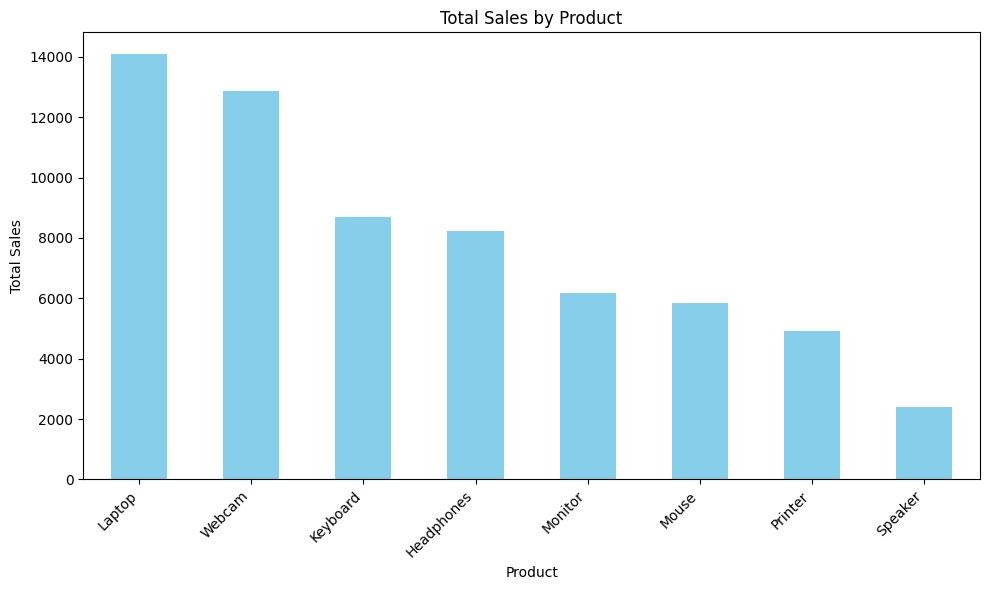

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
category_sales = df_sales.groupby('category')['total_sales'].sum().sort_values(ascending=False)

print("Total Sales by Category:")
print(category_sales)

Total Sales by Category:
category
Peripherals        27386.31
Electronics        20273.81
Audio              10643.32
Office Supplies     4922.19
Name: total_sales, dtype: float64


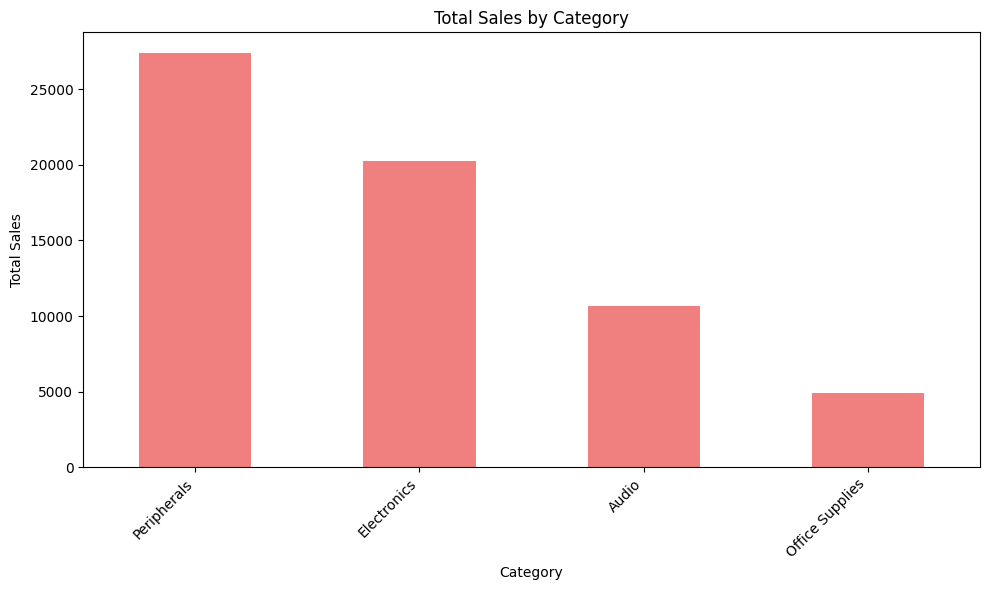

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
df_sales['month'] = df_sales['order_date'].dt.month
monthly_sales = df_sales.groupby('month')['total_sales'].sum().sort_index()

print("Monthly Sales:")
print(monthly_sales)

Monthly Sales:
month
1      6639.75
2      3261.67
3     11497.41
4      7707.05
5     10890.43
6      2517.60
7      4464.82
8      1355.30
9      5274.00
10     2646.90
11     2676.29
12     4294.41
Name: total_sales, dtype: float64


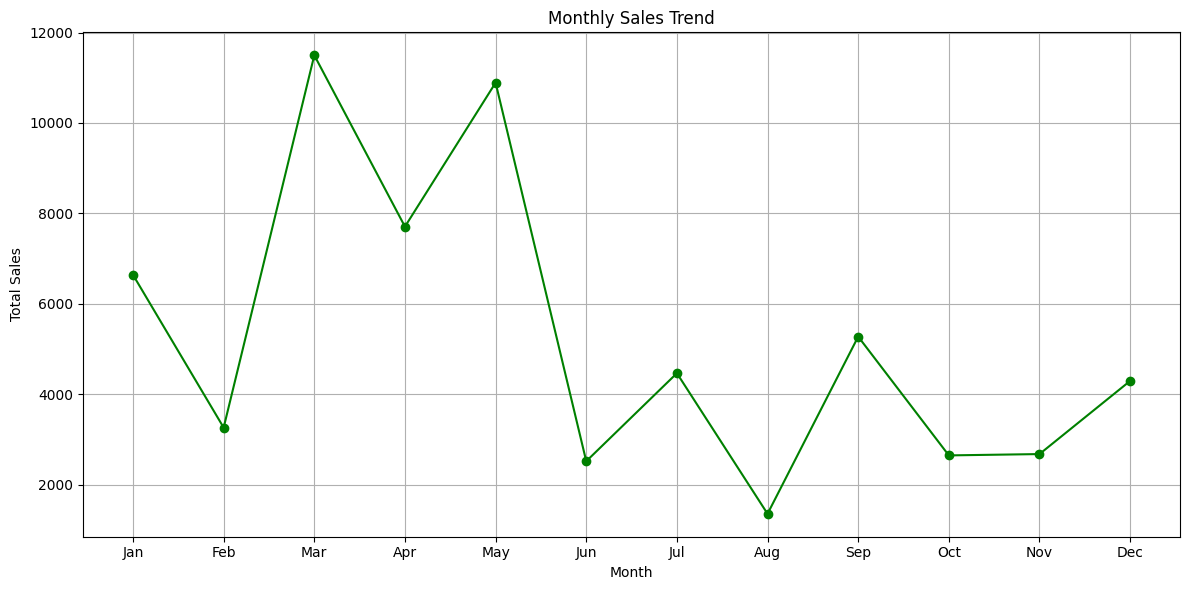

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
df_sales.to_csv('week2_sales_analysis_output.csv', index=False)

print("DataFrame 'df_sales' exported successfully to 'week2_sales_analysis_output.csv'")

DataFrame 'df_sales' exported successfully to 'week2_sales_analysis_output.csv'
